In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
Base.classes

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='Date'>

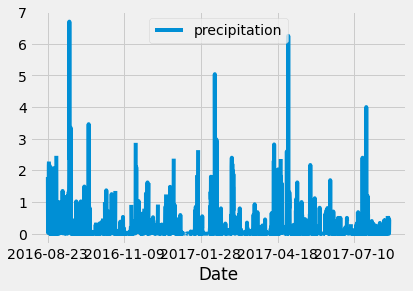

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
lastday = dt.date.fromisoformat(session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0])

# Calculate the date one year from the last date in data set.
prev_year = lastday -  dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date','precipitation'])
# Sort the dataframe by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.name)).all() #or
session.query(Station.name).count()

9

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
for station in stations:
    print(session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
                        func.avg(Measurement.tobs)).\
                        filter(Measurement.station==station[0]).all())

[(54.0, 85.0, 71.66378066378067)]
[(56.0, 87.0, 74.55323054331865)]
[(59.0, 85.0, 72.68918420081211)]
[(56.0, 85.0, 74.5436493068565)]
[(58.0, 84.0, 70.91500765696784)]
[(58.0, 85.0, 74.8732970027248)]
[(53.0, 87.0, 71.61596766043456)]
[(58.0, 87.0, 74.68440233236151)]
[(58.0, 83.0, 72.72407045009784)]


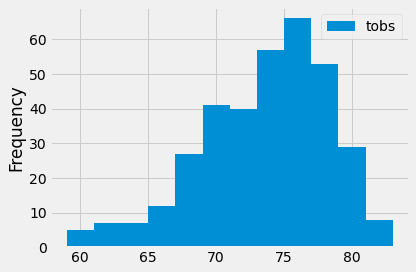

In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station==stations[0][0]).\
    filter(Measurement.date>=prev_year).all()
df = pd.DataFrame(results,columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(startdate,enddate,station='USC00519281'):
    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station==station).\
        filter(Measurement.date>=startdate).\
        filter(Measurement.date<=enddate).all()
    return results


results = calc_temps('2015-10-01','2015-12-31')
print(results)

[(66.0, 80.0, 73.68131868131869)]


# Challenge